In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd #library untuk dataframe
import numpy as np #library untuk komputasi

#library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#menghilangkan warning
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#library dataset split dan model
from sklearn.model_selection import train_test_split

#library untuk evaluasi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Import data ISPU 2021 hasil cleaning

df = pd.read_excel('drive/MyDrive/Model Klasifikasi/ISPU 2021 Hasil Cleaning.xlsx')
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38,53,29,6,31,13,53,PM25,SEDANG
1,2021-01-02,DKI1 (Bunderan HI),27,46,27,7,47,7,47,O3,BAIK
2,2021-01-03,DKI1 (Bunderan HI),44,58,25,7,40,13,58,PM25,SEDANG
3,2021-01-04,DKI1 (Bunderan HI),30,48,24,4,32,7,48,PM25,BAIK
4,2021-01-05,DKI1 (Bunderan HI),38,53,24,6,31,9,53,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
1512,2021-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,54,76,36,14,21,47,76,PM25,SEDANG
1513,2021-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,44,68,20,11,21,33,68,PM25,SEDANG
1514,2021-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,34,54,28,8,25,29,54,PM25,SEDANG
1515,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53,75,25,15,23,44,75,PM25,SEDANG


In [4]:
df.shape      # Menampilkan dimensi dataset

(1517, 11)

In [5]:
df.info()     # Menampilkan dtype tiap atribut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   1517 non-null   object
 1   stasiun   1517 non-null   object
 2   pm10      1517 non-null   int64 
 3   pm25      1517 non-null   int64 
 4   so2       1517 non-null   int64 
 5   co        1517 non-null   int64 
 6   o3        1517 non-null   int64 
 7   no2       1517 non-null   int64 
 8   max       1517 non-null   int64 
 9   critical  1517 non-null   object
 10  categori  1517 non-null   object
dtypes: int64(7), object(4)
memory usage: 130.5+ KB


In [6]:
df.categori.value_counts()    # Cek value kolom target

SEDANG         1147
TIDAK SEHAT     245
BAIK            125
Name: categori, dtype: int64

#### Data pre-processing

In [9]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoder=df.copy()
for i in ['categori']:
    df_encoder[i] = label_encoder.fit_transform(df_encoder[i])

df_encoder

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38,53,29,6,31,13,53,PM25,1
1,2021-01-02,DKI1 (Bunderan HI),27,46,27,7,47,7,47,O3,0
2,2021-01-03,DKI1 (Bunderan HI),44,58,25,7,40,13,58,PM25,1
3,2021-01-04,DKI1 (Bunderan HI),30,48,24,4,32,7,48,PM25,0
4,2021-01-05,DKI1 (Bunderan HI),38,53,24,6,31,9,53,PM25,1
...,...,...,...,...,...,...,...,...,...,...,...
1512,2021-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,54,76,36,14,21,47,76,PM25,1
1513,2021-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,44,68,20,11,21,33,68,PM25,1
1514,2021-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,34,54,28,8,25,29,54,PM25,1
1515,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53,75,25,15,23,44,75,PM25,1


In [10]:
df_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   1517 non-null   object
 1   stasiun   1517 non-null   object
 2   pm10      1517 non-null   int64 
 3   pm25      1517 non-null   int64 
 4   so2       1517 non-null   int64 
 5   co        1517 non-null   int64 
 6   o3        1517 non-null   int64 
 7   no2       1517 non-null   int64 
 8   max       1517 non-null   int64 
 9   critical  1517 non-null   object
 10  categori  1517 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 130.5+ KB


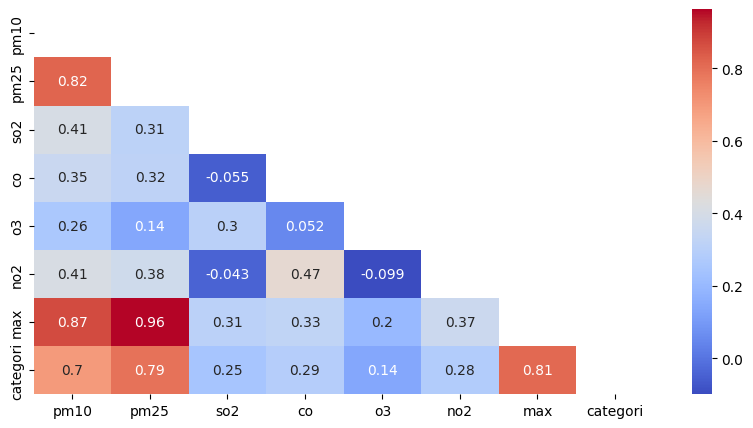

In [11]:
# Cek korelasi variabel

plt.figure(figsize=(10,5))
corr_matrix = df_encoder.corr(method='pearson', numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm')
plt.show()

In [12]:
# Normalisasi

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df_norm = pd.DataFrame(minmax.fit_transform(df.drop(columns=['tanggal','stasiun','critical','max','categori']).values),
                       columns=df.drop(columns=['tanggal','stasiun','critical','max','categori']).columns)
df_norm

,pm10,pm25,so2,co,o3,no2
0,0.140244,0.248447,0.3375,0.097561,0.160839,0.161290
1,0.073171,0.204969,0.3125,0.121951,0.272727,0.064516
2,0.176829,0.279503,0.2875,0.121951,0.223776,0.161290
3,0.091463,0.217391,0.2750,0.048780,0.167832,0.064516
4,0.140244,0.248447,0.2750,0.097561,0.160839,0.096774
...,...,...,...,...,...,...
1512,0.237805,0.391304,0.4250,0.292683,0.090909,0.709677
1513,0.176829,0.341615,0.2250,0.219512,0.090909,0.483871
1514,0.115854,0.254658,0.3250,0.146341,0.118881,0.419355
1515,0.231707,0.385093,0.2875,0.317073,0.104895,0.661290


#### Membagi data set

In [13]:
X = df_norm
y = df_encoder['categori']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
X_train.shape, X_test.shape

((1213, 6), (304, 6))

In [16]:
X_train

,pm10,pm25,so2,co,o3,no2
999,0.231707,0.478261,0.4500,0.146341,0.090909,0.258065
1465,0.146341,0.285714,0.3875,0.292683,0.195804,0.145161
1281,0.243902,0.372671,0.3750,0.292683,0.062937,0.564516
664,0.402439,0.590062,0.8000,0.390244,0.251748,0.516129
602,0.219512,0.428571,0.2500,0.317073,0.125874,0.338710
...,...,...,...,...,...,...
1130,0.195122,0.366460,0.5875,0.121951,0.146853,0.161290
1294,0.073171,0.124224,0.3750,0.121951,0.041958,0.032258
860,0.243902,0.552795,0.4250,0.170732,0.153846,0.241935
1459,0.237805,0.378882,0.4000,0.268293,0.244755,0.193548


In [17]:
y_train

999     1
1465    1
1281    1
664     2
602     1
       ..
1130    1
1294    0
860     2
1459    1
1126    1
Name: categori, Length: 1213, dtype: int64

In [18]:
y_train.value_counts()

1    914
2    195
0    104
Name: categori, dtype: int64

#### Model Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',
                            n_estimators=100,
                            oob_score=True)

rf.fit(X_train,y_train)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [20]:
rf.oob_score_

0.9925803792250618

#### Evaluasi model (test set)

In [21]:
y_pred = rf.predict(X_test)

In [22]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 20   1   0]
 [  1 232   0]
 [  0   0  50]]


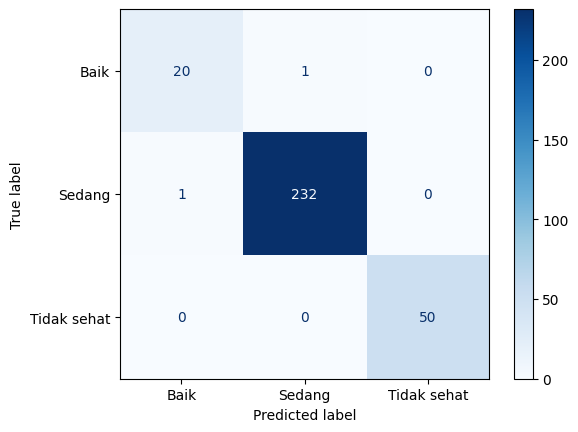

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Baik', 'Sedang', 'Tidak sehat'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00       233
           2       1.00      1.00      1.00        50

    accuracy                           0.99       304
   macro avg       0.98      0.98      0.98       304
weighted avg       0.99      0.99      0.99       304



#### Visualisasi

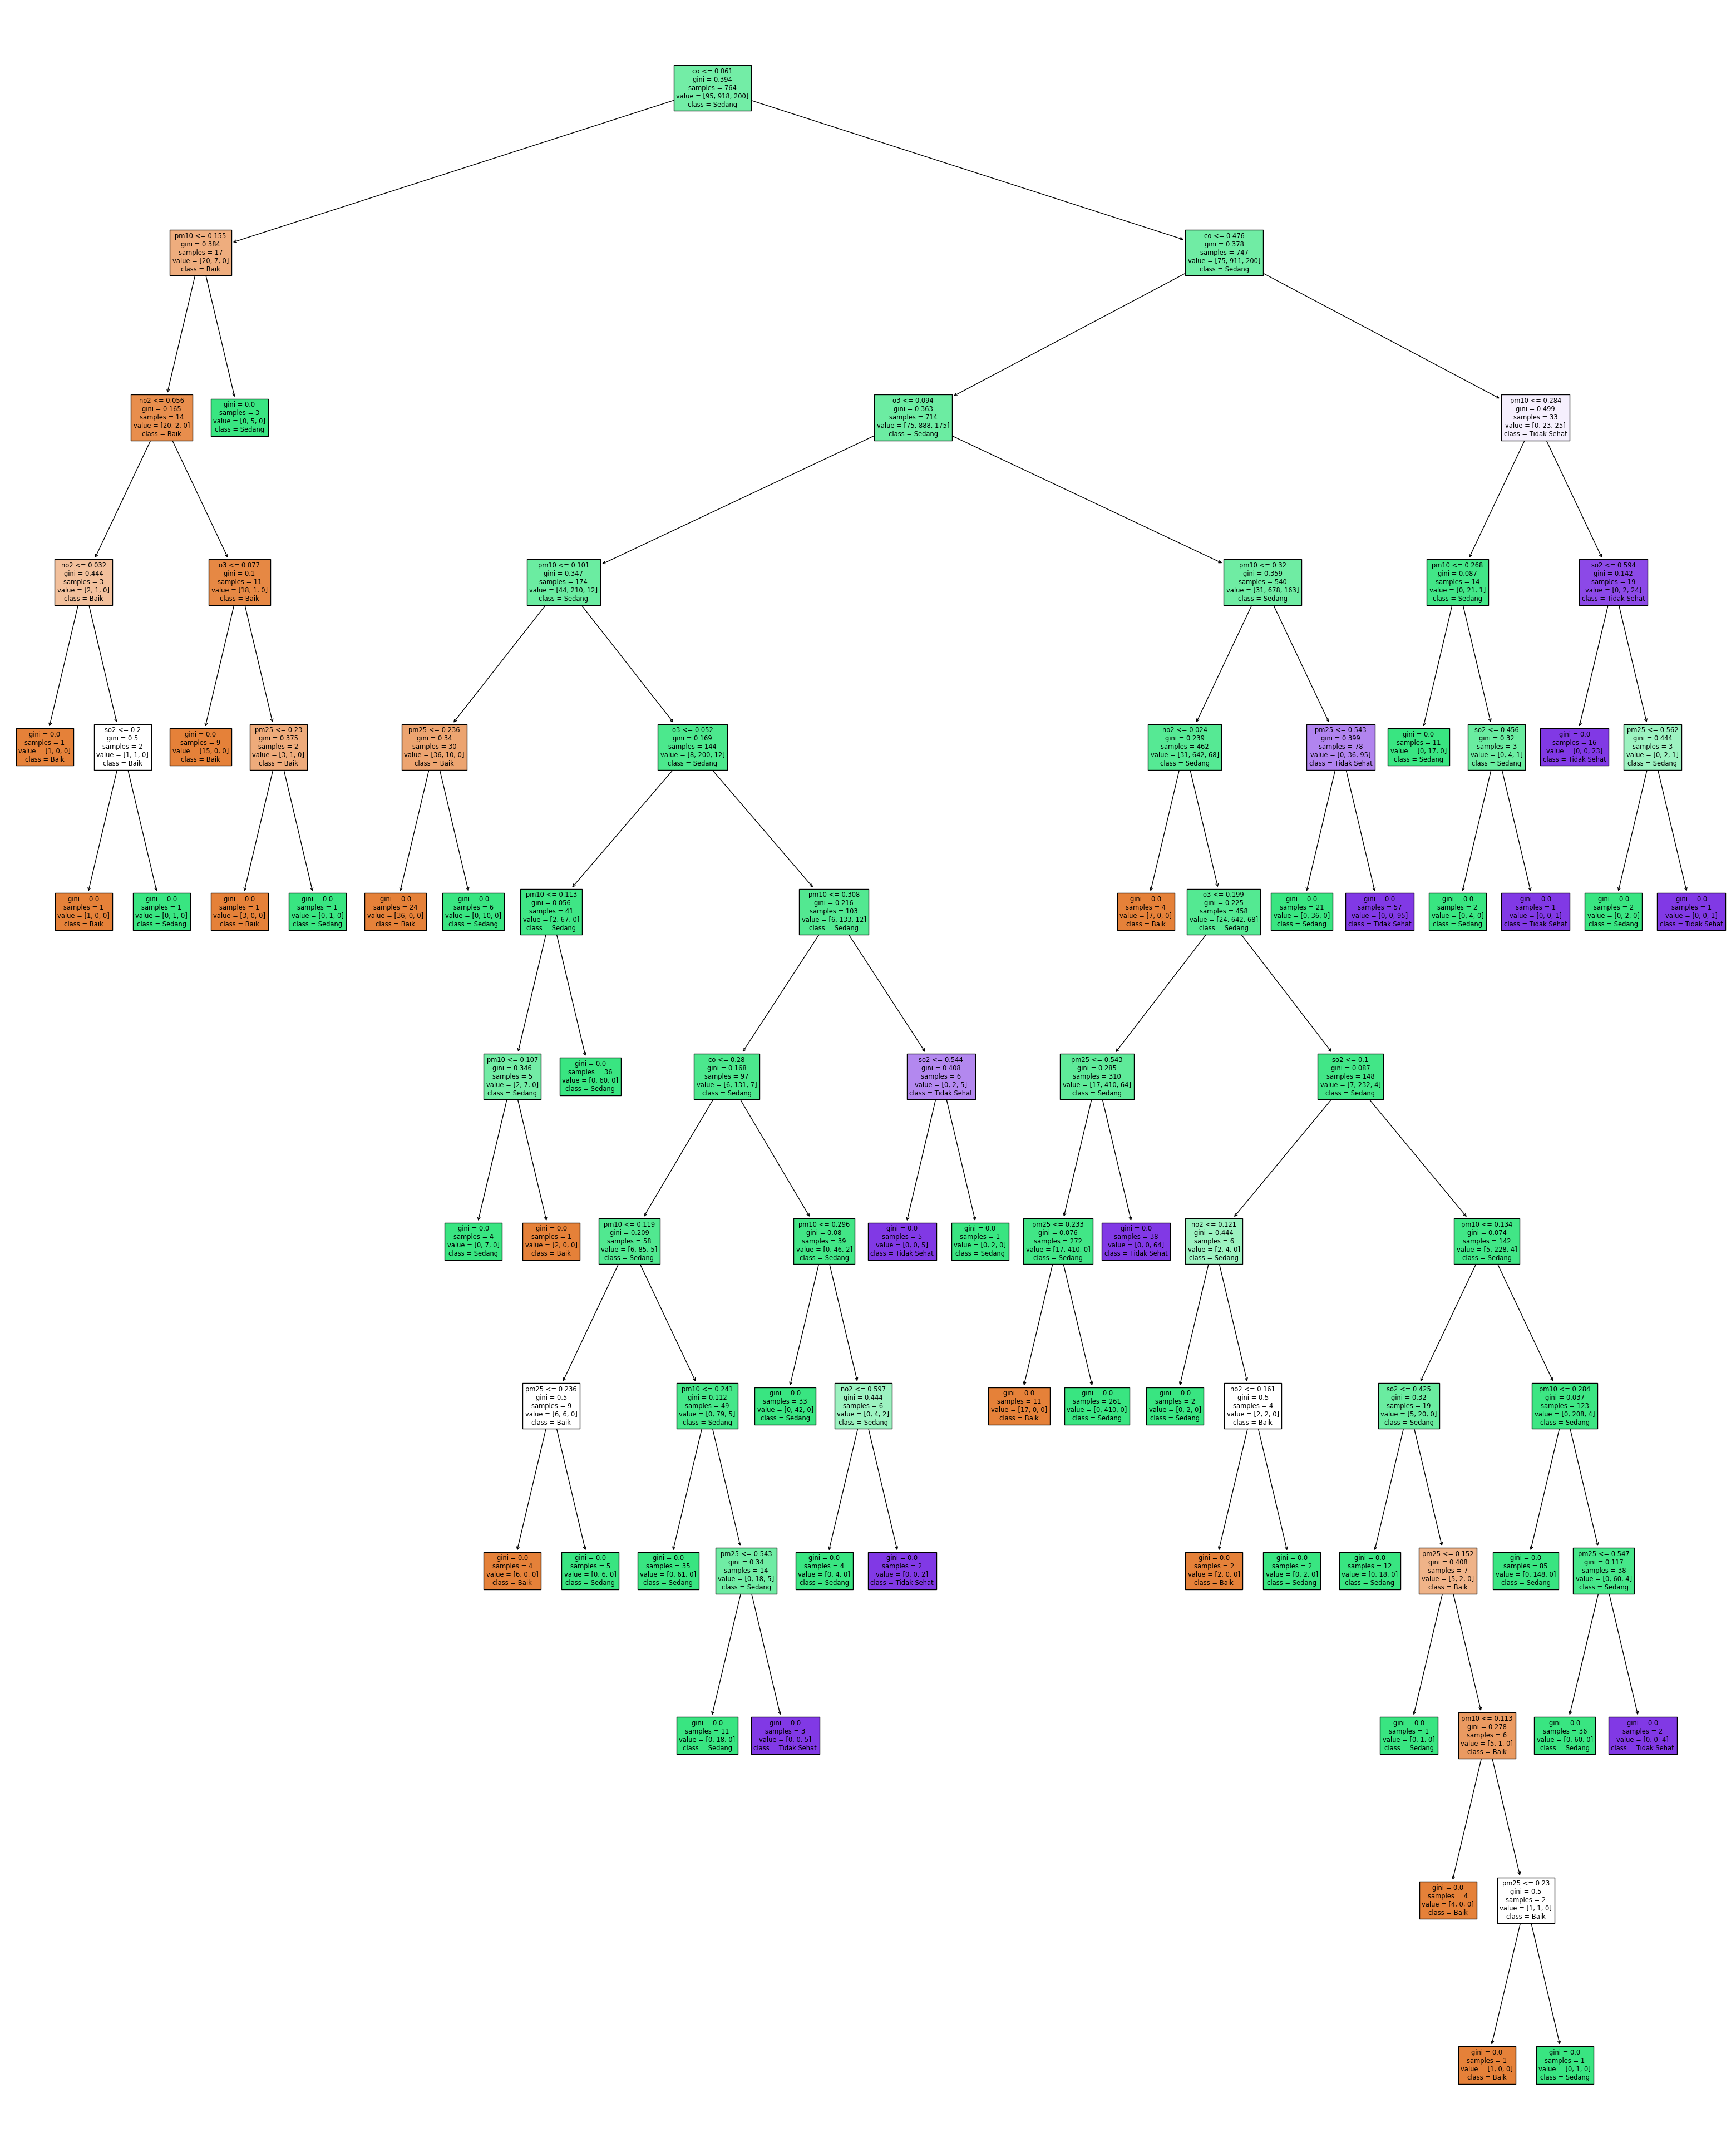

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,50))
plot_tree(rf.estimators_[0], feature_names = X_train.columns, class_names=["Baik", "Sedang", "Tidak Sehat"], filled=True);
plt.savefig('Klasifikasi RF estimators_0.png')

In [27]:
rf.feature_importances_

array([0.19136029, 0.67974902, 0.03001154, 0.02115207, 0.04593516,
       0.03179193])

In [28]:
imp_df = pd.DataFrame({"Varname": X_train.columns,
                       "Imp": rf.feature_importances_})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
1,pm25,0.679749
0,pm10,0.191360
4,o3,0.045935
5,no2,0.031792
2,so2,0.030012
3,co,0.021152


In [29]:
import pickle
filename = 'Model Klasifikasi Random Forest.sav'
pickle.dump(rf, open(filename, 'wb'))

In [30]:
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [31]:
df_skor = pd.DataFrame({'Akurasi':[acc],
                       'Presisi':[prec],
                       'Recall':[rec],
                       'F1_Score':[f1],
                       'Model':['Klasifikasi Random Forest']})
df_skor = df_skor.set_index(df_skor['Model']).drop(columns=['Model'])
df_skor.T

Model,Klasifikasi Random Forest
Akurasi,0.993421
Presisi,0.982696
Recall,0.982696
F1_Score,0.982696
